In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Deploy HR-VITON
!pip install torchgeometry

!git clone https://github.com/sangyun884/HR-VITON.git

!mkdir -p ./HR-VITON/eval_models/weights/v0.1
!cp -r /kaggle/input/hr-viton/* ./HR-VITON/eval_models/weights/v0.1/

!mkdir -p /kaggle/working/data/test
!cp -r /kaggle/input/high-resolution-viton-zalando-dataset/test/* /kaggle/working/data/test

fatal: destination path 'HR-VITON' already exists and is not an empty directory.


In [5]:
# Set sample
import numpy as np
import pandas as pd

image = ["02660_00.jpg", "02660_00.jpg" ,"10698_00.jpg"]
clothes = ["13004_00.jpg", "14260_00.jpg" , "09148_00.jpg"]
df = pd.DataFrame({"image": image, "clothes": clothes})
df.to_csv("/kaggle/working/data/pairs.txt", index=False, header=False, sep=" ")

In [6]:
# Generate image
!cd ./HR-VITON && python3 test_generator.py --occlusion --cuda {True} --gpu_ids {0} --dataroot /kaggle/working/data/ --data_list pairs.txt --output_dir /kaggle/working/output/

Namespace(gpu_ids='0', workers=4, batch_size=1, fp16=False, cuda='True', test_name='test', dataroot='/kaggle/working/data/', datamode='test', data_list='pairs.txt', output_dir='/kaggle/working/output/', datasetting='unpaired', fine_width=768, fine_height=1024, tensorboard_dir='./data/zalando-hd-resize/tensorboard', checkpoint_dir='checkpoints', tocg_checkpoint='./eval_models/weights/v0.1/mtviton.pth', gen_checkpoint='./eval_models/weights/v0.1/gen.pth', tensorboard_count=100, shuffle=False, semantic_nc=13, output_nc=13, gen_semantic_nc=7, warp_feature='T1', out_layer='relu', clothmask_composition='warp_grad', upsample='bilinear', occlusion=True, norm_G='spectralaliasinstance', ngf=64, init_type='xavier', init_variance=0.02, num_upsampling_layers='most')
Start to test %s!
Network [SPADEGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/kaggle/working/HR-VITON/test_generator.py:128: DeprecationWarning: `np.float` is a deprecate

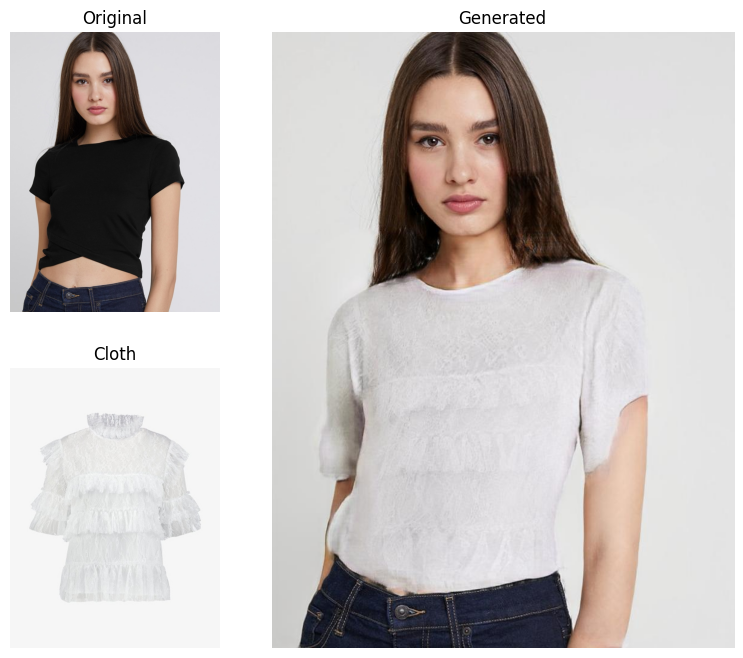

In [7]:
import matplotlib.pyplot as plt

idx = 1

img_ori = plt.imread(f"/kaggle/working/data/test/image/{image[idx]}")
cloth = plt.imread(f"/kaggle/working/data/test/cloth/{clothes[idx]}")
img_new = plt.imread(
    f"/kaggle/working/output/{image[idx][:-4]}_{clothes[idx][:-4]}.png", 0
)

plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 3, wspace=0, hspace=0.2)

plt.subplot(grid[0, 0])
plt.imshow(img_ori)
plt.axis("off")
plt.title("Original")

plt.subplot(grid[1, 0])
plt.imshow(cloth)
plt.axis("off")
plt.title("Cloth")

plt.subplot(grid[:, 1:])
plt.imshow(img_new)
plt.axis("off")
plt.title("Generated")

plt.show()

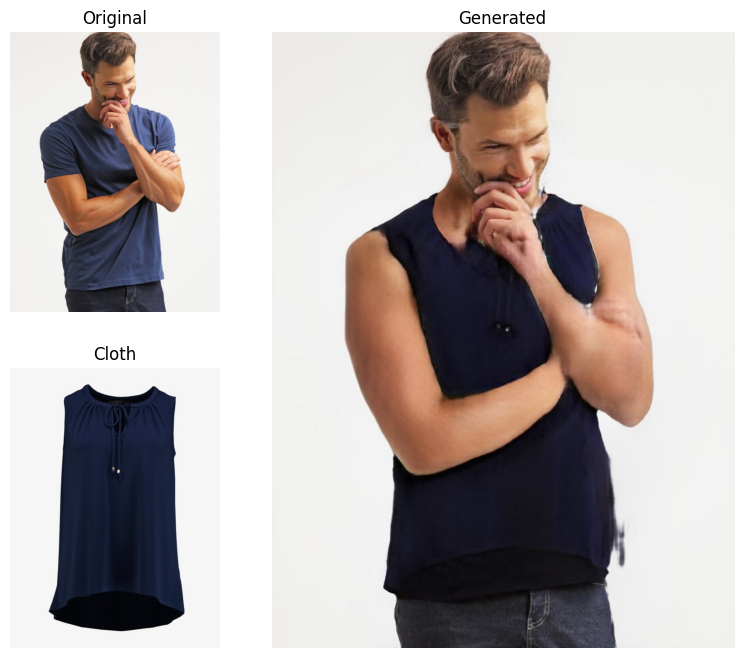

In [8]:
import matplotlib.pyplot as plt

idx = 2

img_ori = plt.imread(f"/kaggle/working/data/test/image/{image[idx]}")
cloth = plt.imread(f"/kaggle/working/data/test/cloth/{clothes[idx]}")
img_new = plt.imread(
    f"/kaggle/working/output/{image[idx][:-4]}_{clothes[idx][:-4]}.png", 0
)

plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 3, wspace=0, hspace=0.2)

plt.subplot(grid[0, 0])
plt.imshow(img_ori)
plt.axis("off")
plt.title("Original")

plt.subplot(grid[1, 0])
plt.imshow(cloth)
plt.axis("off")
plt.title("Cloth")

plt.subplot(grid[:, 1:])
plt.imshow(img_new)
plt.axis("off")
plt.title("Generated")

plt.show()

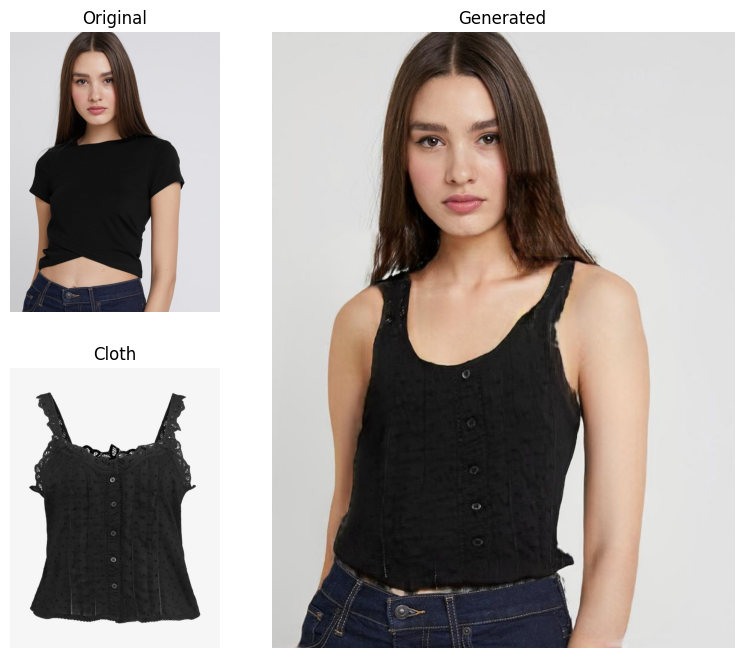

In [9]:
# Show result
import matplotlib.pyplot as plt

idx = 0

img_ori = plt.imread(f"/kaggle/working/data/test/image/{image[idx]}")
cloth = plt.imread(f"/kaggle/working/data/test/cloth/{clothes[idx]}")
img_new = plt.imread(
    f"/kaggle/working/output/{image[idx][:-4]}_{clothes[idx][:-4]}.png", 0
)

plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 3, wspace=0, hspace=0.2)

plt.subplot(grid[0, 0])
plt.imshow(img_ori)
plt.axis("off")
plt.title("Original")

plt.subplot(grid[1, 0])
plt.imshow(cloth)
plt.axis("off")
plt.title("Cloth")

plt.subplot(grid[:, 1:])
plt.imshow(img_new)
plt.axis("off")
plt.title("Generated")

plt.show()

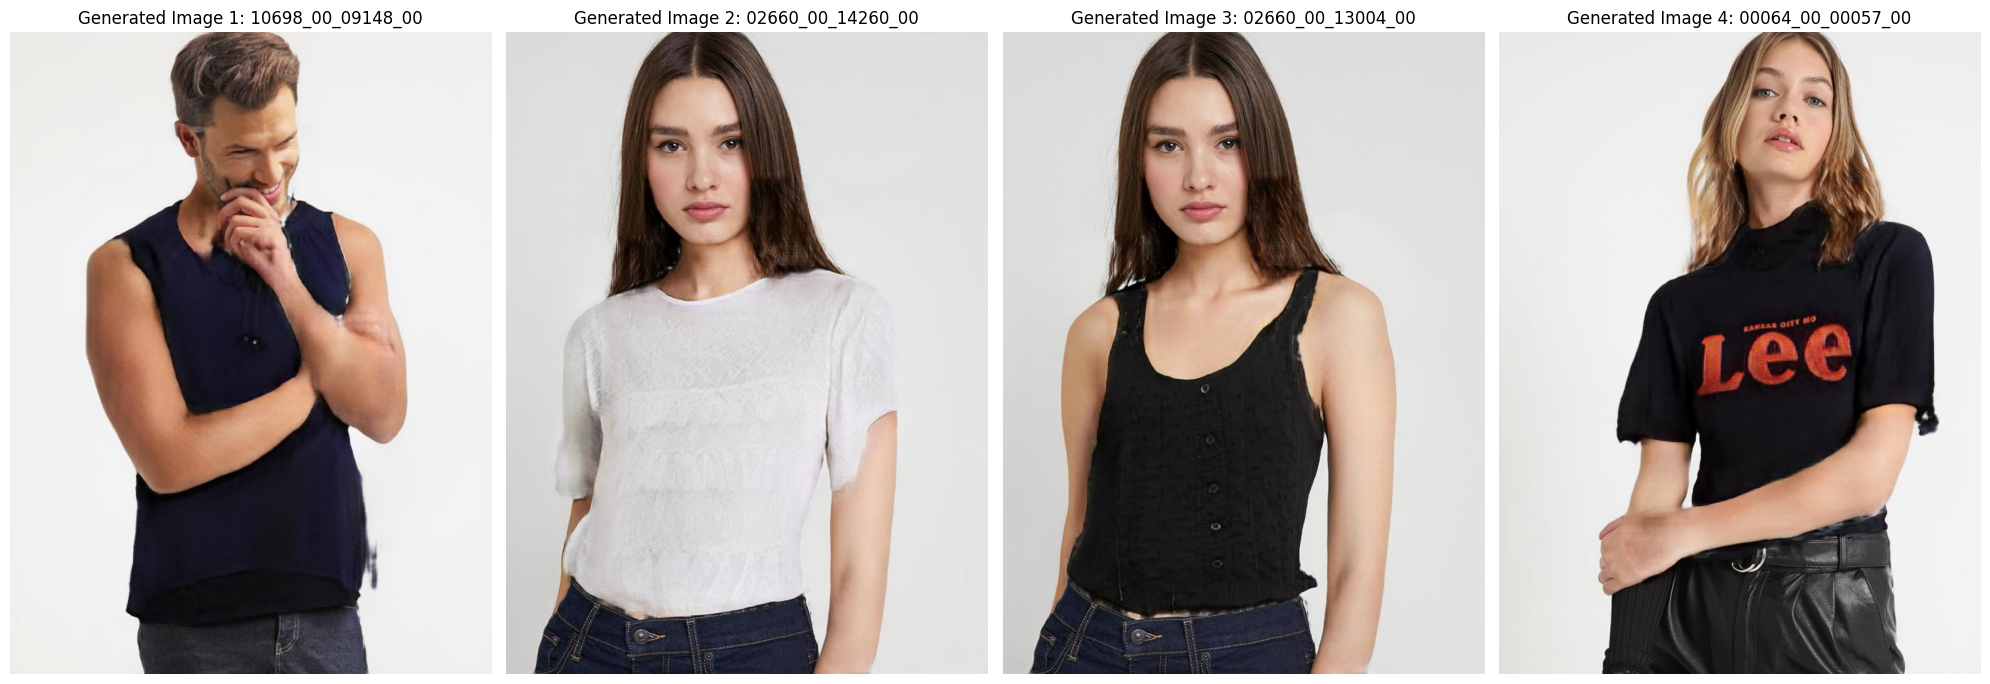

In [22]:

import matplotlib.pyplot as plt
from PIL import Image

# Define paths for images and clothes
image_paths = [
    "/kaggle/working/output/10698_00_09148_00.png",
    "/kaggle/working/output/02660_00_14260_00.png",
    "/kaggle/working/output/02660_00_13004_00.png",
    "/kaggle/working/output/00064_00_00057_00.png"
]

# Define titles for the images
titles = [
    "Generated Image 1: 10698_00_09148_00",
    "Generated Image 2: 02660_00_14260_00",
    "Generated Image 3: 02660_00_13004_00",
    "Generated Image 4: 00064_00_00057_00"
]

# Display the images
plt.figure(figsize=(20, 10))

for idx, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    plt.subplot(1, 4, idx+1)
    plt.imshow(img)
    plt.title(titles[idx])
    plt.axis("off")

plt.tight_layout()
plt.show()



In [10]:
import numpy as np
import pandas as pd

image = ["00064_00.jpg", "02660_00.jpg"]
clothes = ["00057_00.jpg", "14260_00.jpg"]  # Change this to the filename of the new clothing item
df = pd.DataFrame({"image": image, "clothes": clothes})
df.to_csv("/kaggle/working/data/pairs.txt", index=False, header=False, sep=" ")

# Run the test_generator.py script with the new clothing item
!cd ./HR-VITON && python3 test_generator.py --occlusion --cuda {True} --gpu_ids {0} --dataroot /kaggle/working/data/ --data_list pairs.txt --output_dir /kaggle/working/output/

# Print the paths to images, clothes, and final generated image
print("Image Paths:")
for idx, img_name in enumerate(image):
    print(f"Image {idx+1}: /kaggle/working/data/test/image/{img_name}")

print("\nClothing Paths:")
for idx, cloth_name in enumerate(clothes):
    print(f"Clothing {idx+1}: /kaggle/working/data/test/cloth/{cloth_name}")

print("\nGenerated Image Path:")
for idx, img_name in enumerate(image):
    print(f"Generated Image {idx+1}: /kaggle/working/output/{img_name[:-4]}_{clothes[idx][:-4]}.png")


Namespace(gpu_ids='0', workers=4, batch_size=1, fp16=False, cuda='True', test_name='test', dataroot='/kaggle/working/data/', datamode='test', data_list='pairs.txt', output_dir='/kaggle/working/output/', datasetting='unpaired', fine_width=768, fine_height=1024, tensorboard_dir='./data/zalando-hd-resize/tensorboard', checkpoint_dir='checkpoints', tocg_checkpoint='./eval_models/weights/v0.1/mtviton.pth', gen_checkpoint='./eval_models/weights/v0.1/gen.pth', tensorboard_count=100, shuffle=False, semantic_nc=13, output_nc=13, gen_semantic_nc=7, warp_feature='T1', out_layer='relu', clothmask_composition='warp_grad', upsample='bilinear', occlusion=True, norm_G='spectralaliasinstance', ngf=64, init_type='xavier', init_variance=0.02, num_upsampling_layers='most')
Start to test %s!
Network [SPADEGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/kaggle/working/HR-VITON/test_generator.py:128: DeprecationWarning: `np.float` is a deprecate

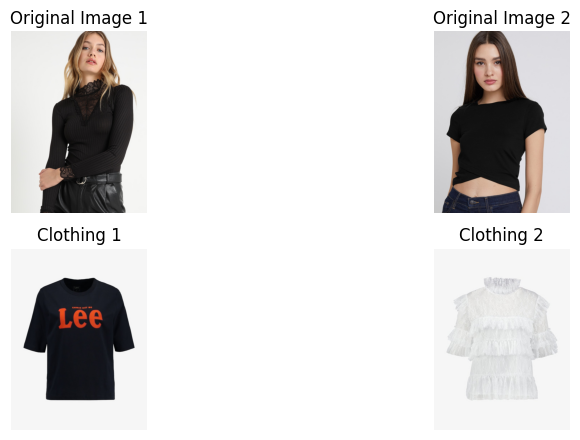

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Define image paths
image_paths = [
    "/kaggle/working/data/test/image/00064_00.jpg",
    "/kaggle/working/data/test/image/02660_00.jpg"
]

cloth_paths = [
    "/kaggle/working/data/test/cloth/00057_00.jpg",
    "/kaggle/working/data/test/cloth/14260_00.jpg"
]

generated_image_paths = [
    "/kaggle/working/output/00064_00_00057_00.png",
    "/kaggle/working/output/02660_00_14260_00.png"
]

# Display original images
plt.figure(figsize=(10, 8))
for i, image_path in enumerate(image_paths):
    plt.subplot(3, 2, i + 1)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Original Image {i+1}")
    plt.axis("off")

# Display clothing images
for i, cloth_path in enumerate(cloth_paths):
    plt.subplot(3, 2, i + 3)
    img = Image.open(cloth_path)
    plt.imshow(img)
    plt.title(f"Clothing {i+1}")
    plt.axis("off")

# Display generated




personal testing

fatal: destination path 'HR-VITON' already exists and is not an empty directory.
Namespace(gpu_ids='0', workers=4, batch_size=1, fp16=False, cuda='True', test_name='test', dataroot='/kaggle/working/data/', datamode='test', data_list='pairs.txt', output_dir='/kaggle/working/output/', datasetting='unpaired', fine_width=768, fine_height=1024, tensorboard_dir='./data/zalando-hd-resize/tensorboard', checkpoint_dir='checkpoints', tocg_checkpoint='./eval_models/weights/v0.1/mtviton.pth', gen_checkpoint='./eval_models/weights/v0.1/gen.pth', tensorboard_count=100, shuffle=False, semantic_nc=13, output_nc=13, gen_semantic_nc=7, warp_feature='T1', out_layer='relu', clothmask_composition='warp_grad', upsample='bilinear', occlusion=True, norm_G='spectralaliasinstance', ngf=64, init_type='xavier', init_variance=0.02, num_upsampling_layers='most')
Start to test %s!
Network [SPADEGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
Traceback (m

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/output/person_cloth.png'

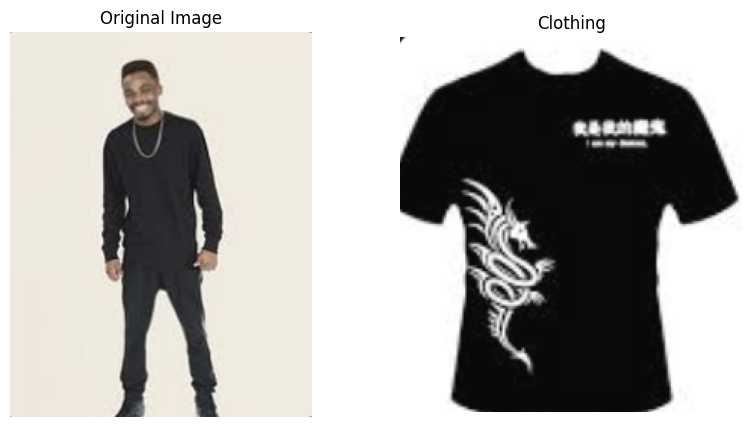

In [23]:
# Install dependencies and clone the HR-VITON repository
!pip install torchgeometry
!git clone https://github.com/sangyun884/HR-VITON.git

# Create necessary directories and copy pretrained models
!mkdir -p ./HR-VITON/eval_models/weights/v0.1
!cp -r /kaggle/input/hr-viton/* ./HR-VITON/eval_models/weights/v0.1/

# Create directories for test data
!mkdir -p /kaggle/working/data/test/image
!mkdir -p /kaggle/working/data/test/cloth

# Copy the personal images to the respective directories
!cp "/kaggle/input/personal-testing/Screenshot 2024-05-31 at 8.35.45PM.png" /kaggle/working/data/test/image/person.png
!cp "/kaggle/input/personal-testing/Screenshot 2024-05-31 at 8.37.55PM.png" /kaggle/working/data/test/cloth/cloth.png

# Create pairs.txt file
import pandas as pd

df = pd.DataFrame({"image": ["person.png"], "clothes": ["cloth.png"]})
df.to_csv("/kaggle/working/data/pairs.txt", index=False, header=False, sep=" ")

# Run HR-VITON model
!cd ./HR-VITON && python3 test_generator.py --occlusion --cuda {True} --gpu_ids {0} --dataroot /kaggle/working/data/ --data_list pairs.txt --output_dir /kaggle/working/output/

# Display the results
from PIL import Image
import matplotlib.pyplot as plt

# Define image paths
image_paths = [
    "/kaggle/working/data/test/image/person.png"
]

cloth_paths = [
    "/kaggle/working/data/test/cloth/cloth.png"
]

generated_image_paths = [
    "/kaggle/working/output/person_cloth.png"
]

# Display original image
plt.figure(figsize=(15, 5))

# Original Image
img_ori = Image.open(image_paths[0])
plt.subplot(1, 3, 1)
plt.imshow(img_ori)
plt.title("Original Image")
plt.axis("off")

# Clothing Image
cloth = Image.open(cloth_paths[0])
plt.subplot(1, 3, 2)
plt.imshow(cloth)
plt.title("Clothing")
plt.axis("off")

# Generated Image
generated_img = Image.open(generated_image_paths[0])
plt.subplot(1, 3, 3)
plt.imshow(generated_img)
plt.title("Generated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
/kaggle/working/output

end